# Creación del modelo

In [1]:
import sys
from packaging import version
import sklearn
import tensorflow as tf
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import pandas as pd
from sklearn.model_selection import train_test_split



In [2]:
# Carga de los datos
df = pd.read_csv("./NuevoData.csv", delimiter=',')

df_mdl = df[["LIMIT_BAL", "SEX", "AGE", "_1", "_2", "_3", "_4", "MARRIAGE_1", "MARRIAGE_2", "MARRIAGE_3", "default payment next month"]]


## Modelo MLP

In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [4]:
X = df_mdl.iloc[:, :-1] 
Y = tf.keras.utils.to_categorical(df_mdl.iloc[:, -1], num_classes=2)

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42)

In [5]:
X_train.shape

(18944, 10)

In [6]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()

model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dense(5, activation="relu"))
model.add(tf.keras.layers.Dense(2, activation="softmax"))


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 55        
                                                                 
 dense_1 (Dense)             (None, 2)                 12        
                                                                 
Total params: 67 (268.00 Byte)
Trainable params: 67 (268.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Optimizadores

In [8]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [9]:
historySGD = model.fit(X_train, y_train, epochs=1000,
                    validation_data=(X_valid, y_valid))

Epoch 1/1000


592/592 [==============================] - 2s 2ms/step - loss: 121636.3359 - accuracy: 0.7748 - val_loss: 0.6231 - val_accuracy: 0.7827
Epoch 2/1000
592/592 [==============================] - 1s 2ms/step - loss: 0.6042 - accuracy: 0.7759 - val_loss: 0.5835 - val_accuracy: 0.7827
Epoch 3/1000
592/592 [==============================] - 1s 2ms/step - loss: 0.5751 - accuracy: 0.7759 - val_loss: 0.5607 - val_accuracy: 0.7827
Epoch 4/1000
592/592 [==============================] - 1s 2ms/step - loss: 0.5582 - accuracy: 0.7759 - val_loss: 0.5470 - val_accuracy: 0.7827
Epoch 5/1000
592/592 [==============================] - 1s 2ms/step - loss: 0.5483 - accuracy: 0.7759 - val_loss: 0.5388 - val_accuracy: 0.7827
Epoch 6/1000
592/592 [==============================] - 1s 2ms/step - loss: 0.5422 - accuracy: 0.7759 - val_loss: 0.5336 - val_accuracy: 0.7827
Epoch 7/1000
592/592 [==============================] - 1s 2ms/step - loss: 0.5385 - accuracy: 0.7759 - val_loss: 0.5303 - val_ac

In [10]:
train_loss = historySGD.history['loss'] 
train_accuracy = historySGD.history['accuracy']  
valid_loss = historySGD.history['val_loss'] 
valid_accuracy = historySGD.history['val_accuracy']  

In [11]:
for epoch in range(len(train_loss)):
    print(f"Epoch {epoch+1}:")
    print(f"  Training Loss: {train_loss[epoch]}, Training Accuracy: {train_accuracy[epoch]}")
    print(f"  Validation Loss: {valid_loss[epoch]}, Validation Accuracy: {valid_accuracy[epoch]}")

Epoch 1:
  Training Loss: 121636.3359375, Training Accuracy: 0.7748099565505981
  Validation Loss: 0.6230536103248596, Validation Accuracy: 0.7827280163764954
Epoch 2:
  Training Loss: 0.6041941046714783, Training Accuracy: 0.7758657336235046
  Validation Loss: 0.5835213661193848, Validation Accuracy: 0.7827280163764954
Epoch 3:
  Training Loss: 0.5750857591629028, Training Accuracy: 0.7758657336235046
  Validation Loss: 0.5606849193572998, Validation Accuracy: 0.7827280163764954
Epoch 4:
  Training Loss: 0.5582327842712402, Training Accuracy: 0.7758657336235046
  Validation Loss: 0.5470410585403442, Validation Accuracy: 0.7827280163764954
Epoch 5:
  Training Loss: 0.5482559204101562, Training Accuracy: 0.7758657336235046
  Validation Loss: 0.5387736558914185, Validation Accuracy: 0.7827280163764954
Epoch 6:
  Training Loss: 0.5422311425209045, Training Accuracy: 0.7758657336235046
  Validation Loss: 0.5335677266120911, Validation Accuracy: 0.7827280163764954
Epoch 7:
  Training Loss: 

#### Momentum

In [12]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()

model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dense(5, activation="relu"))
model.add(tf.keras.layers.Dense(2, activation="softmax"))

In [13]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
model.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [14]:
historySGDM = model.fit(X_train, y_train, epochs=1000,
                    validation_data=(X_valid, y_valid))

Epoch 1/1000
592/592 [==============================] - 2s 2ms/step - loss: 42884.1953 - accuracy: 0.7748 - val_loss: 0.5252 - val_accuracy: 0.7827
Epoch 2/1000
592/592 [==============================] - 1s 2ms/step - loss: 0.5324 - accuracy: 0.7759 - val_loss: 0.5236 - val_accuracy: 0.7827
Epoch 3/1000
592/592 [==============================] - 1s 2ms/step - loss: 0.5321 - accuracy: 0.7759 - val_loss: 0.5236 - val_accuracy: 0.7827
Epoch 4/1000
592/592 [==============================] - 1s 2ms/step - loss: 0.5321 - accuracy: 0.7759 - val_loss: 0.5235 - val_accuracy: 0.7827
Epoch 5/1000
592/592 [==============================] - 1s 2ms/step - loss: 0.5321 - accuracy: 0.7759 - val_loss: 0.5237 - val_accuracy: 0.7827
Epoch 6/1000
592/592 [==============================] - 1s 2ms/step - loss: 0.5321 - accuracy: 0.7759 - val_loss: 0.5235 - val_accuracy: 0.7827
Epoch 7/1000
592/592 [==============================] - 1s 2ms/step - loss: 0.5321 - accuracy: 0.7759 - val_loss: 0.5236 - val_accur

In [15]:
train_loss = historySGDM.history['loss'] 
train_accuracy = historySGDM.history['accuracy']  
valid_loss = historySGDM.history['val_loss'] 
valid_accuracy = historySGDM.history['val_accuracy']  

In [16]:
for epoch in range(len(train_loss)):
    print(f"Epoch {epoch+1}:")
    print(f"  Training Loss: {train_loss[epoch]}, Training Accuracy: {train_accuracy[epoch]}")
    print(f"  Validation Loss: {valid_loss[epoch]}, Validation Accuracy: {valid_accuracy[epoch]}")

Epoch 1:
  Training Loss: 42884.1953125, Training Accuracy: 0.7748099565505981
  Validation Loss: 0.5251954793930054, Validation Accuracy: 0.7827280163764954
Epoch 2:
  Training Loss: 0.5323540568351746, Training Accuracy: 0.7758657336235046
  Validation Loss: 0.5236326456069946, Validation Accuracy: 0.7827280163764954
Epoch 3:
  Training Loss: 0.5321263670921326, Training Accuracy: 0.7758657336235046
  Validation Loss: 0.523642897605896, Validation Accuracy: 0.7827280163764954
Epoch 4:
  Training Loss: 0.5321317315101624, Training Accuracy: 0.7758657336235046
  Validation Loss: 0.5235294699668884, Validation Accuracy: 0.7827280163764954
Epoch 5:
  Training Loss: 0.5321221947669983, Training Accuracy: 0.7758657336235046
  Validation Loss: 0.5236878991127014, Validation Accuracy: 0.7827280163764954
Epoch 6:
  Training Loss: 0.5321329236030579, Training Accuracy: 0.7758657336235046
  Validation Loss: 0.52354496717453, Validation Accuracy: 0.7827280163764954
Epoch 7:
  Training Loss: 0.53

#### ADAGRAD

In [17]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()

model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dense(5, activation="relu"))
model.add(tf.keras.layers.Dense(2, activation="softmax"))

In [18]:
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.001)
model.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [19]:
historyADA = model.fit(X_train, y_train, epochs=1000,
                    validation_data=(X_valid, y_valid))

Epoch 1/1000


592/592 [==============================] - 2s 2ms/step - loss: 60.8746 - accuracy: 0.6995 - val_loss: 6.9404 - val_accuracy: 0.7827
Epoch 2/1000
592/592 [==============================] - 1s 2ms/step - loss: 7.6568 - accuracy: 0.6965 - val_loss: 1.6676 - val_accuracy: 0.7827
Epoch 3/1000
592/592 [==============================] - 1s 2ms/step - loss: 6.0516 - accuracy: 0.6985 - val_loss: 7.5523 - val_accuracy: 0.7827
Epoch 4/1000
592/592 [==============================] - 1s 2ms/step - loss: 5.0816 - accuracy: 0.6972 - val_loss: 5.3166 - val_accuracy: 0.7827
Epoch 5/1000
592/592 [==============================] - 1s 2ms/step - loss: 4.2941 - accuracy: 0.7012 - val_loss: 7.3315 - val_accuracy: 0.7827
Epoch 6/1000
592/592 [==============================] - 1s 2ms/step - loss: 3.9940 - accuracy: 0.7065 - val_loss: 1.1122 - val_accuracy: 0.6674
Epoch 7/1000
592/592 [==============================] - 1s 2ms/step - loss: 3.7461 - accuracy: 0.7022 - val_loss: 1.0647 - val_accuracy: 0.6603
Epoc

In [20]:
train_loss = historyADA.history['loss'] 
train_accuracy = historyADA.history['accuracy']  
valid_loss = historyADA.history['val_loss'] 
valid_accuracy = historyADA.history['val_accuracy']  

In [21]:
for epoch in range(len(train_loss)):
    print(f"Epoch {epoch+1}:")
    print(f"  Training Loss: {train_loss[epoch]}, Training Accuracy: {train_accuracy[epoch]}")
    print(f"  Validation Loss: {valid_loss[epoch]}, Validation Accuracy: {valid_accuracy[epoch]}")

Epoch 1:
  Training Loss: 60.874595642089844, Training Accuracy: 0.6995354890823364
  Validation Loss: 6.940351963043213, Validation Accuracy: 0.7827280163764954
Epoch 2:
  Training Loss: 7.656778812408447, Training Accuracy: 0.6964738368988037
  Validation Loss: 1.6676033735275269, Validation Accuracy: 0.7827280163764954
Epoch 3:
  Training Loss: 6.051638126373291, Training Accuracy: 0.6985325217247009
  Validation Loss: 7.552335262298584, Validation Accuracy: 0.7827280163764954
Epoch 4:
  Training Loss: 5.081567287445068, Training Accuracy: 0.697212815284729
  Validation Loss: 5.316567420959473, Validation Accuracy: 0.7827280163764954
Epoch 5:
  Training Loss: 4.294105052947998, Training Accuracy: 0.701224684715271
  Validation Loss: 7.331454753875732, Validation Accuracy: 0.7827280163764954
Epoch 6:
  Training Loss: 3.994002103805542, Training Accuracy: 0.7064505815505981
  Validation Loss: 1.1122087240219116, Validation Accuracy: 0.6674408912658691
Epoch 7:
  Training Loss: 3.74607

#### ADAM

In [22]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()

model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dense(5, activation="relu"))
model.add(tf.keras.layers.Dense(2, activation="softmax"))

In [23]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9,
                                     beta_2=0.999)
model.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [24]:
historyADM = model.fit(X_train, y_train, epochs=1000,
                    validation_data=(X_valid, y_valid))

Epoch 1/1000
592/592 [==============================] - 2s 2ms/step - loss: 294.7612 - accuracy: 0.7291 - val_loss: 0.6120 - val_accuracy: 0.7663
Epoch 2/1000
592/592 [==============================] - 1s 2ms/step - loss: 0.6819 - accuracy: 0.7075 - val_loss: 0.5894 - val_accuracy: 0.7827
Epoch 3/1000
592/592 [==============================] - 1s 2ms/step - loss: 0.7737 - accuracy: 0.7243 - val_loss: 0.7860 - val_accuracy: 0.7827
Epoch 4/1000
592/592 [==============================] - 1s 2ms/step - loss: 0.7741 - accuracy: 0.7113 - val_loss: 0.7506 - val_accuracy: 0.7827
Epoch 5/1000
592/592 [==============================] - 1s 2ms/step - loss: 0.6196 - accuracy: 0.7531 - val_loss: 0.6710 - val_accuracy: 0.7827
Epoch 6/1000
592/592 [==============================] - 1s 2ms/step - loss: 0.6343 - accuracy: 0.7501 - val_loss: 0.5316 - val_accuracy: 0.7827
Epoch 7/1000
592/592 [==============================] - 1s 2ms/step - loss: 0.6294 - accuracy: 0.7503 - val_loss: 0.5114 - val_accurac

In [25]:
train_loss = historyADM.history['loss'] 
train_accuracy = historyADM.history['accuracy']  
valid_loss = historyADM.history['val_loss'] 
valid_accuracy = historyADM.history['val_accuracy']  

In [26]:
for epoch in range(len(train_loss)):
    print(f"Epoch {epoch+1}:")
    print(f"  Training Loss: {train_loss[epoch]}, Training Accuracy: {train_accuracy[epoch]}")
    print(f"  Validation Loss: {valid_loss[epoch]}, Validation Accuracy: {valid_accuracy[epoch]}")

Epoch 1:
  Training Loss: 294.76116943359375, Training Accuracy: 0.7290962934494019
  Validation Loss: 0.6120092868804932, Validation Accuracy: 0.7662584185600281
Epoch 2:
  Training Loss: 0.6818750500679016, Training Accuracy: 0.7075063586235046
  Validation Loss: 0.5894455313682556, Validation Accuracy: 0.7827280163764954
Epoch 3:
  Training Loss: 0.7736547589302063, Training Accuracy: 0.7242926359176636
  Validation Loss: 0.7860444188117981, Validation Accuracy: 0.7827280163764954
Epoch 4:
  Training Loss: 0.7741307020187378, Training Accuracy: 0.7113069891929626
  Validation Loss: 0.7505900263786316, Validation Accuracy: 0.7827280163764954
Epoch 5:
  Training Loss: 0.6195554137229919, Training Accuracy: 0.7530616521835327
  Validation Loss: 0.6710062026977539, Validation Accuracy: 0.7827280163764954
Epoch 6:
  Training Loss: 0.6343453526496887, Training Accuracy: 0.7501055598258972
  Validation Loss: 0.531593918800354, Validation Accuracy: 0.7827280163764954
Epoch 7:
  Training Los

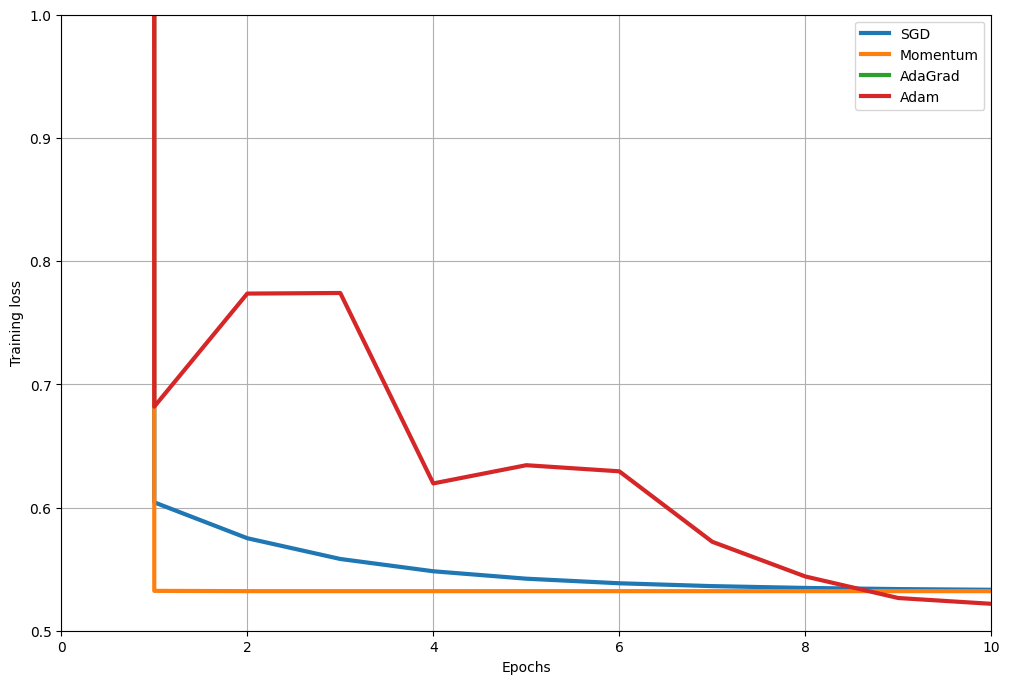

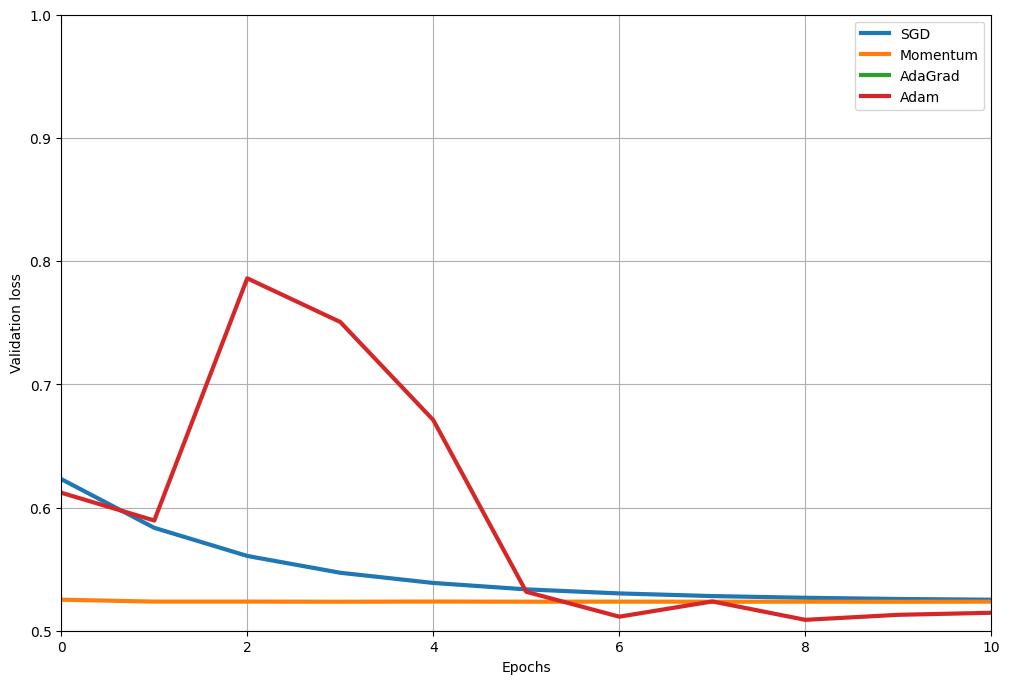

In [39]:
import matplotlib.pyplot as plt
for loss in ("loss", "val_loss"):
    plt.figure(figsize=(12, 8))
    opt_names = "SGD Momentum AdaGrad Adam"
    for history, opt_name in zip((historySGD, historySGDM,
                                  historyADA, historyADM,
                                 ),
                                 opt_names.split()):
        plt.plot(history.history[loss], label=f"{opt_name}", linewidth=3)

    plt.grid()
    plt.xlabel("Epochs")
    plt.ylabel({"loss": "Training loss", "val_loss": "Validation loss"}[loss])
    plt.legend(loc="upper right")
    plt.axis([0, 10, 0.5, 1])
    plt.show()